## Import important libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from kmodes.kmodes import KModes
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Filter out any warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/prabh/OneDrive/Desktop/Minor/cardio_train.csv", sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
print(df.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


## Univariate Analysis

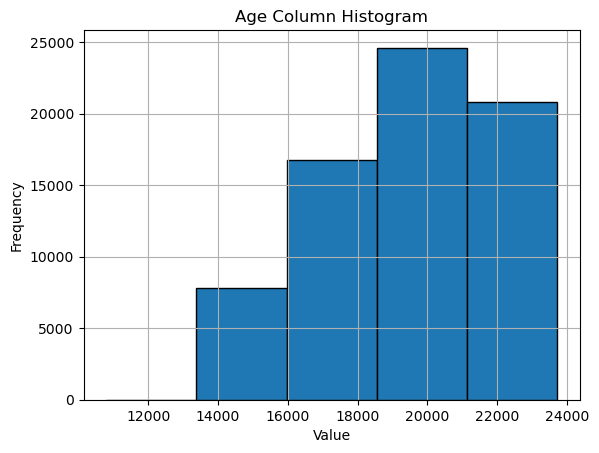

In [5]:
plt.hist(df['age'], bins=5, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Age Column Histogram')
plt.grid(True)
plt.show()

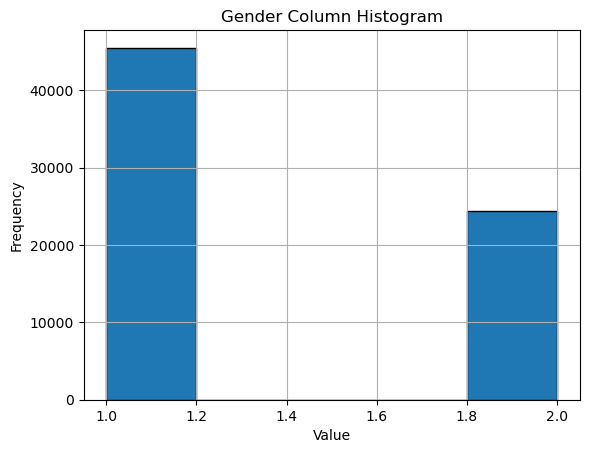

In [6]:
plt.hist(df['gender'], bins=5, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Gender Column Histogram')
plt.grid(True)
plt.show()

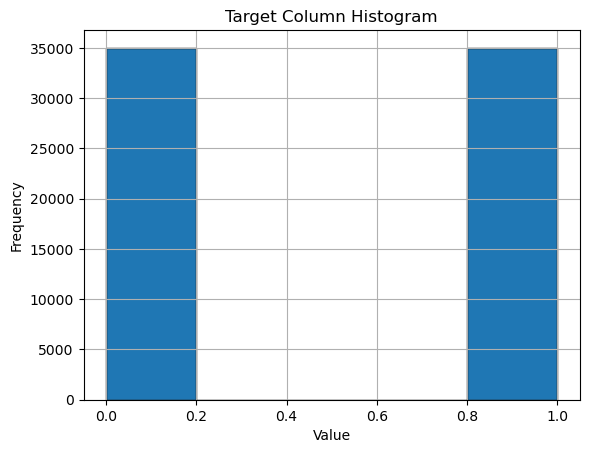

In [7]:
plt.hist(df['cardio'], bins=5, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Target Column Histogram')
plt.grid(True)
plt.show()

In [8]:
#drop id
df = df.drop('id', axis=1)

In [9]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Removing outliers

In [10]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)
len(df)

60142

In [11]:
df[df['ap_lo']> df['ap_hi']].shape[0]

0

In [12]:
#after removing outliers
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,19468.719979,1.347311,164.554854,73.426805,125.770526,81.046307,1.350953,1.220229,0.085631,0.051877,0.803648,0.488228
std,2460.510296,0.476120,6.830174,11.614806,13.761847,8.239157,0.670076,0.567607,0.279820,0.221781,0.397241,0.499866
min,10798.000000,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17677.250000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19705.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21321.000000,2.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,180.000000,106.000000,163.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df['age'] = (df['age'] / 365).round().astype('int')

print(df.head())

   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   52       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
4   48       1     156    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0  


In [14]:
# # Define the bin edges and labels
age_edges = [30, 35, 40, 45, 50, 55, 60, 65]
age_labels = [0, 1, 2, 3, 4, 5, 6]

#  bin in  5 years span
df['age_group'] = pd.cut(df['age'], bins=7, labels=range(7), include_lowest=True,right=True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3


df['bmi'] = df['weight']/((df['height']/100)**2) calculates the Body Mass Index (BMI) for each row in the DataFrame df using the weight and height columns.

In [15]:
df['bmi'] = df['weight']/((df['height']/100)**2)
df.head()

bmiMin = int(df['bmi'].min())
bmiMax = int(df['bmi'].max())

print(bmiMin, bmiMax)

df['bmi'] = pd.cut(df['bmi'], bins=6, labels=range(6), right=True, include_lowest=True)

df.head()
df["bmi"].value_counts(normalize=True)

16 46


bmi
1    0.461325
2    0.330202
3    0.133068
0    0.038193
4    0.033554
5    0.003658
Name: proportion, dtype: float64

df['map'] = ((2* df['ap_lo']) + df['ap_hi']) / 3, a new column named 'map' is created in the DataFrame df. This column appears to calculate the Mean Arterial Pressure (MAP) based on the values in the 'ap_lo' (diastolic blood pressure) and 'ap_hi' (systolic blood pressure) columns.

In [16]:
df['map'] = ((2* df['ap_lo']) + df['ap_hi']) / 3

mapMin = int(df['map'].min())
mapMax = int(df['map'].max())

print(mapMin, mapMax)

df['map'] = pd.cut(df['map'], bins=6, labels=range(6), right=True, include_lowest=True)

df.head()

73 121


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3,1,2
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4,3,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4,1,2
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,2,5
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3,1,0


In [17]:
null_rows = df[df.isnull().any(axis=1)]
print("Rows with null values:")
print(null_rows)

Rows with null values:
Empty DataFrame
Columns: [age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, age_group, bmi, map]
Index: []


In [18]:
df_og=df

df=df.drop(['height','weight','ap_hi','ap_lo','age'],axis=1)

df.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,2,1,1,0,0,1,0,3,1,2
1,1,3,1,0,0,1,1,4,3,4
2,1,3,1,0,0,0,1,4,1,2
3,2,1,1,0,0,1,1,3,2,5
4,1,1,1,0,0,0,0,3,1,0


In [19]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.describe()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
count,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,0.347311,0.350953,0.220229,0.085631,0.051877,0.803648,0.488228,4.042233,1.673440,2.359449
std,0.476120,0.670076,0.567607,0.279820,0.221781,0.397241,0.499866,1.377070,0.898707,1.186906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,2.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,2.000000,3.000000
max,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,5.000000


In [20]:
y = df['cardio']

## Kmode model

Clustering is used in machine learning to find similarities between data by grouping. The most common technique for clustering is K-means. However, it is not effective for categorical data. K-means uses a Euclidean distance measure differences between data points. For our data, we have used K-modes which is the appropriate clustering algorithm for categorical data because it uses mode-based distance between the categories, so it is more suitable for categorical data. To find the optimal number of clusters, we have utilized the elbow curve method.

In [21]:
df_temp = df.drop('cardio', axis=1)
df_temp.head()

,gender,cholesterol,gluc,smoke,alco,active,age_group,bmi,map
0,1,0,0,0,0,1,3,1,2
1,0,2,0,0,0,1,4,3,4
2,0,2,0,0,0,0,4,1,2
3,1,0,0,0,0,1,3,2,5
4,0,0,0,0,0,0,3,1,0


In [22]:
cost = []
num_clusters = range(1,6) # 1 to 5
for i in list(num_clusters):
    kmode = KModes(n_clusters=i, init = "Huang", n_init = 5, verbose=0,random_state=1)
    kmode.fit_predict(df_temp)
    cost.append(kmode.cost_)

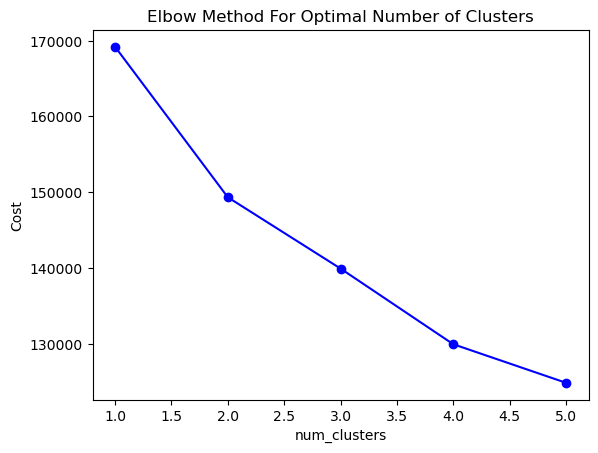

In [23]:
plt.plot(num_clusters, cost, 'bo-')
plt.xlabel('num_clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [24]:
km = KModes(n_clusters=2, init = "Huang", n_init = 5,random_state=1)
clusters = km.fit_predict(df_temp)
clusters

array([1, 0, 1, ..., 0, 0, 1], dtype=uint16)

In [25]:
df.insert(0,"clusters",clusters,True)

df.head()

,clusters,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,1,1,0,0,0,0,1,0,3,1,2
1,0,0,2,0,0,0,1,1,4,3,4
2,1,0,2,0,0,0,0,1,4,1,2
3,0,1,0,0,0,0,1,1,3,2,5
4,1,0,0,0,0,0,0,0,3,1,0


## Bivariate Analysis

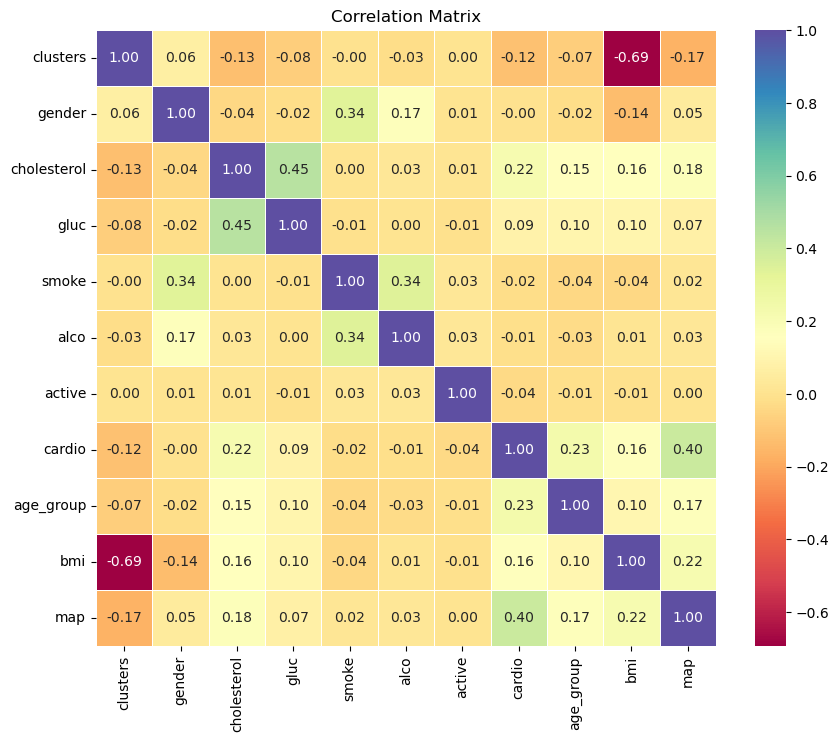

In [26]:
# Set up figure
plt.figure(figsize=(10, 8))

# Draw correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='Spectral', fmt=".2f", linewidths=.5)

# Show the figure
plt.title('Correlation Matrix')
plt.show()

'gender' has a correlation of 0 to our target 'cardio', and 'smoke' has a correlation of '0.01'. We will remove those features to increase performance.

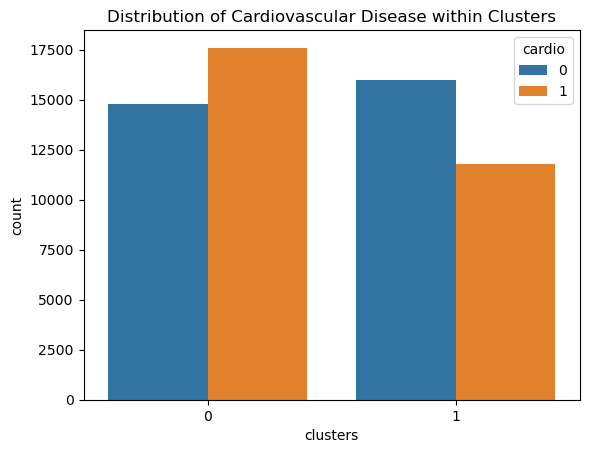

In [27]:
sns.countplot(x='clusters', hue='cardio', data=df)
plt.title('Distribution of Cardiovascular Disease within Clusters')
plt.show()

In [28]:
x = df.drop(['cardio','gender','alco'], axis=1)
x.head()

,clusters,cholesterol,gluc,smoke,active,age_group,bmi,map
0,1,0,0,0,1,3,1,2
1,0,2,0,0,1,4,3,4
2,1,2,0,0,0,4,1,2
3,0,0,0,0,1,3,2,5
4,1,0,0,0,0,3,1,0


## Train Test Split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [30]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48113 entries, 20655 to 38356
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   clusters     48113 non-null  uint16
 1   cholesterol  48113 non-null  int64 
 2   gluc         48113 non-null  int64 
 3   smoke        48113 non-null  int64 
 4   active       48113 non-null  int64 
 5   age_group    48113 non-null  int64 
 6   bmi          48113 non-null  int64 
 7   map          48113 non-null  int64 
dtypes: int64(7), uint16(1)
memory usage: 3.0 MB


## Logistic Regression Model

In [31]:
#without cv
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [32]:
logreg_pred = logreg.predict(x_test)

In [33]:
# accuracy
logreg_accuracy = metrics.accuracy_score(y_test, logreg_pred)*100
print(f"Accuracy without CV: {logreg_accuracy:.2f}")

Accuracy without CV: 71.78


GridsearchCV cross-validation technique that finds the optimal parameter values for a model

In [34]:
# Define the parameter grid for logistic regression
logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'lbfgs', 'sag'],  # Optimization algorithm
    'max_iter': [100, 200, 300],  # Maximum number of iterations
    'tol': [1e-4, 1e-3, 1e-2]  # Tolerance for stopping criteria
}

# Instantiate the logistic regression model
logreg = LogisticRegression()

# Create grid search
logreg_gridsearch = GridSearchCV(estimator=logreg, param_grid=logreg_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search
logreg_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'sag'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='accuracy')

## Get Best parameters and best estimator for LogisticRegression from GridSearchCV

In [35]:
best_params = logreg_gridsearch.best_params_
best_estimator = logreg_gridsearch.best_estimator_

print(f"Best Parameters : {best_params}")
print(f"Best Estimator  : {best_estimator}")

Best Parameters : {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}
Best Estimator  : LogisticRegression(C=0.01, penalty='l1', solver='liblinear', tol=0.01)


Make prediction using best estimator

In [36]:
logreg_pred_cv = best_estimator.predict(x_test)

In [37]:
logreg_accuracy_cv = metrics.accuracy_score(y_test, logreg_pred_cv)*100
print(f"Best Accuracy: {logreg_accuracy_cv:.2f}")

Best Accuracy: 71.66


In [38]:
print(f"Random Forest accuracy without CV : {logreg_accuracy:.2f}")
print(f"Random Forest accuracy with CV    : {logreg_accuracy_cv:.2f}")

Random Forest accuracy without CV : 71.78
Random Forest accuracy with CV    : 71.66


Classification Report

In [39]:
classification_report_str = classification_report(y_test, logreg_pred_cv, digits=4)

print("Classification Report for Logistic Regression with CV:\n", classification_report_str)

Classification Report for Logistic Regression with CV:
               precision    recall  f1-score   support

           0     0.7024    0.7842    0.7411      6220
           1     0.7360    0.6442    0.6870      5809

    accuracy                         0.7166     12029
   macro avg     0.7192    0.7142    0.7141     12029
weighted avg     0.7186    0.7166    0.7150     12029



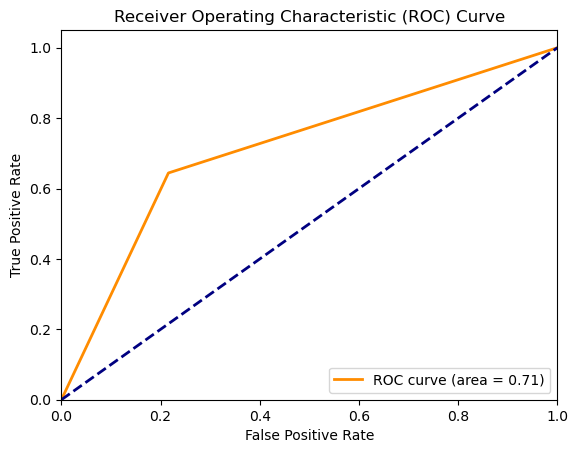

In [40]:
from sklearn.metrics import roc_curve, auc

# Assuming you have your true labels for the test set (y_test) and predictions (y_test_pred)
# y_test: true labels
# y_test_pred: predicted labels or probabilities for the positive class

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, logreg_pred_cv)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

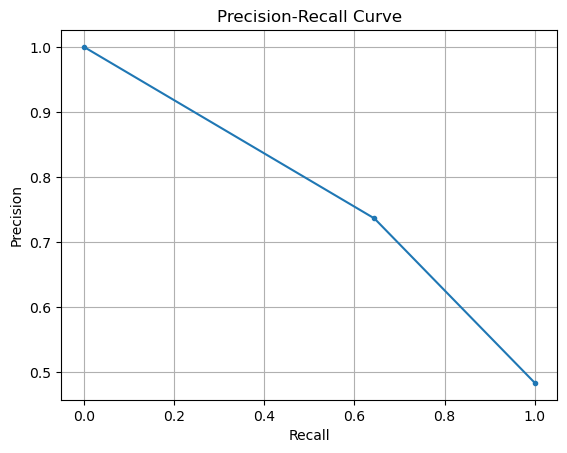

In [41]:
# Assuming you have true labels y_true and model predictions y_pred
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, logreg_pred_cv)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

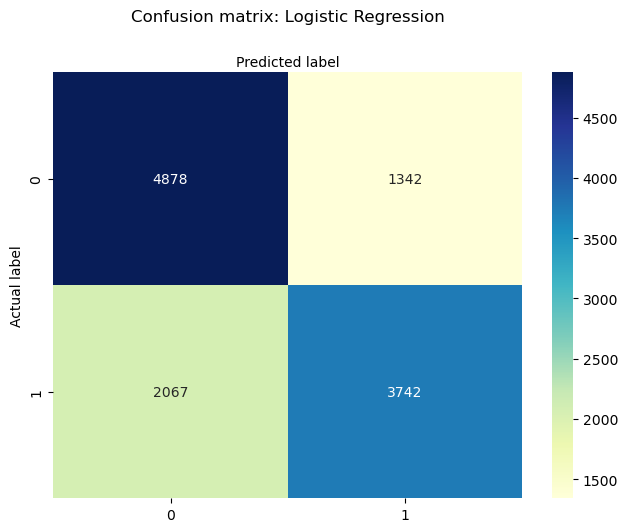

In [42]:
cnf_matrix = metrics.confusion_matrix(y_test, logreg_pred_cv)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Random Forest Model

In [43]:
#without cv
rf = RandomForestClassifier(random_state=1)

# Fit the model
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [44]:
rf_pred = rf.predict(x_test)

In [45]:
# accuracy
rf_accuracy = metrics.accuracy_score(y_test, rf_pred)*100
print(f"Accuracy without CV: {rf_accuracy:.2f}")

Accuracy without CV: 71.09


In [46]:
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
}

#  Best parameters for RF
rf_best_params = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [10],
    'min_samples_leaf': [1],
    'max_features': [None],
}

# Create grid search
rf_gridsearch = GridSearchCV(estimator=rf,param_grid=rf_best_params, cv=5, scoring='accuracy',n_jobs=-1)

# Fit grid search
rf_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10], 'max_features': [None],
                         'min_samples_leaf': [1], 'min_samples_split': [10],
                         'n_estimators': [100]},
             scoring='accuracy')

In [47]:
best_params = rf_gridsearch.best_params_
best_estimator = rf_gridsearch.best_estimator_

print(f"Best Parameters : {best_params}")
print(f"Best Estimator  : {best_estimator}")

Best Parameters : {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Estimator  : RandomForestClassifier(max_depth=10, max_features=None, min_samples_split=10,
                       random_state=1)


In [48]:
rf_pred_cv = best_estimator.predict(x_test)

In [49]:
rf_accuracy_cv = metrics.accuracy_score(y_test, rf_pred_cv)*100
print(f"Best Accuracy: {rf_accuracy_cv:.2f}")

Best Accuracy: 71.78


In [50]:
print(f"Random Forest accuracy without CV : {rf_accuracy:.2f}")
print(f"Random Forest accuracy with CV    : {rf_accuracy_cv:.2f}")

Random Forest accuracy without CV : 71.09
Random Forest accuracy with CV    : 71.78


In [51]:
classification_report_str = classification_report(y_test, rf_pred_cv, digits=4)

print("Classification Report for Logistic Regression with CV:\n", classification_report_str)

Classification Report for Logistic Regression with CV:
               precision    recall  f1-score   support

           0     0.7161    0.7529    0.7340      6220
           1     0.7200    0.6803    0.6996      5809

    accuracy                         0.7178     12029
   macro avg     0.7180    0.7166    0.7168     12029
weighted avg     0.7180    0.7178    0.7174     12029



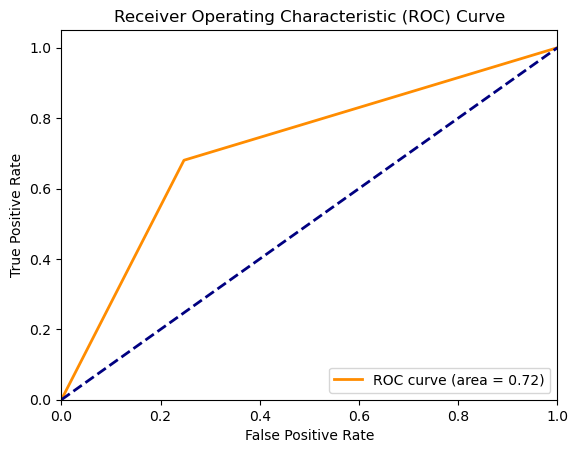

In [52]:
from sklearn.metrics import roc_curve, auc

# Assuming you have your true labels for the test set (y_test) and predictions (y_test_pred)
# y_test: true labels
# y_test_pred: predicted labels or probabilities for the positive class

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, rf_pred_cv)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

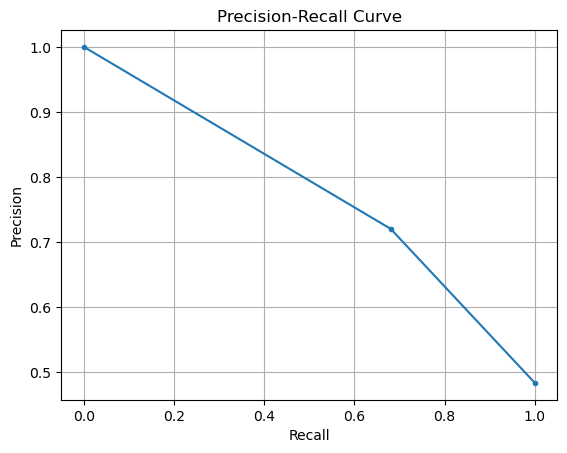

In [53]:
# Assuming you have true labels y_true and model predictions y_pred
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, rf_pred_cv)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

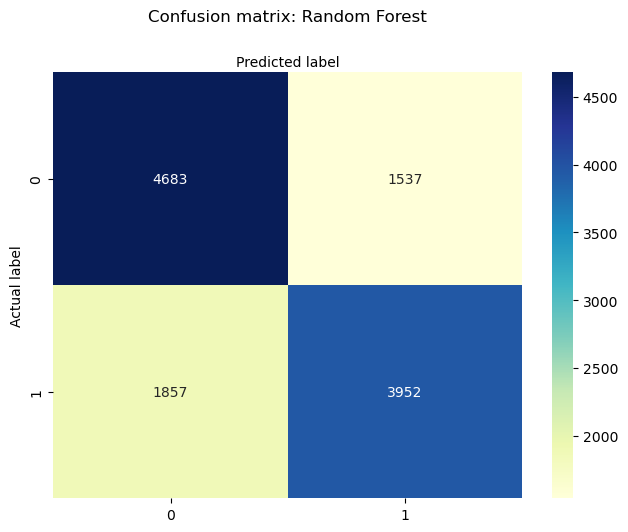

In [54]:
cnf_matrix = metrics.confusion_matrix(y_test, rf_pred_cv)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## MLP Model

In [55]:
#without cv
mlp = MLPClassifier(random_state=1)

# Fit the model
mlp.fit(x_train, y_train)

MLPClassifier(random_state=1)

In [56]:
mlp_pred = mlp.predict(x_test)

In [57]:
# accuracy
mlp_accuracy = metrics.accuracy_score(y_test, mlp_pred)*100
print(f"Accuracy without CV: {mlp_accuracy:.2f}")

Accuracy without CV: 72.15


In [58]:
# Best parameters for MLP
mlp_param_grid = {
    'activation': ['tanh'],
    'alpha': [0.01],
    'hidden_layer_sizes': [(50, 50)],
    'max_iter': [300],
    'solver': ['adam'],
}

# Create grid search
mlp_gridsearch = GridSearchCV(estimator=mlp, param_grid=mlp_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search
mlp_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1), n_jobs=-1,
             param_grid={'activation': ['tanh'], 'alpha': [0.01],
                         'hidden_layer_sizes': [(50, 50)], 'max_iter': [300],
                         'solver': ['adam']},
             scoring='accuracy')

In [59]:
# mlp_best_params = mlp_gridsearch.best_params_
mlp_best_estimator = mlp_gridsearch.best_estimator_
print(f"Best Estimator  : {mlp_best_estimator}")

Best Estimator  : MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(50, 50),
              max_iter=300, random_state=1)


In [60]:
mlp_pred_cv = mlp_best_estimator.predict(x_test)

In [61]:
mlp_accuracy_cv = metrics.accuracy_score(y_test, mlp_pred_cv)*100
print(f"Best Accuracy: {mlp_accuracy_cv:.2f}")

Best Accuracy: 72.13


In [62]:
print(f"MLP accuracy without CV : {mlp_accuracy:.2f}")
print(f"MLP accuracy with CV    : {mlp_accuracy_cv:.2f}")

MLP accuracy without CV : 72.15
MLP accuracy with CV    : 72.13


In [63]:
classification_report_str = classification_report(y_test, mlp_pred_cv, digits=4)

print("Classification Report for MLP with CV:\n", classification_report_str)

Classification Report for MLP with CV:
               precision    recall  f1-score   support

           0     0.6981    0.8122    0.7508      6220
           1     0.7563    0.6239    0.6837      5809

    accuracy                         0.7213     12029
   macro avg     0.7272    0.7180    0.7173     12029
weighted avg     0.7262    0.7213    0.7184     12029



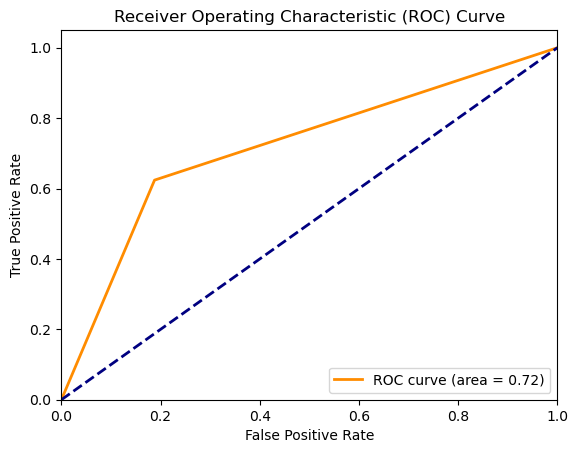

In [64]:
from sklearn.metrics import roc_curve, auc

# Assuming you have your true labels for the test set (y_test) and predictions (y_test_pred)
# y_test: true labels
# y_test_pred: predicted labels or probabilities for the positive class

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, mlp_pred_cv)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

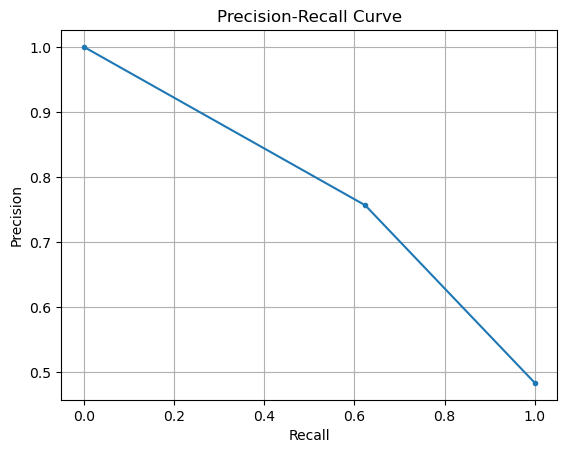

In [65]:
# Assuming you have true labels y_true and model predictions y_pred
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, mlp_pred_cv)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

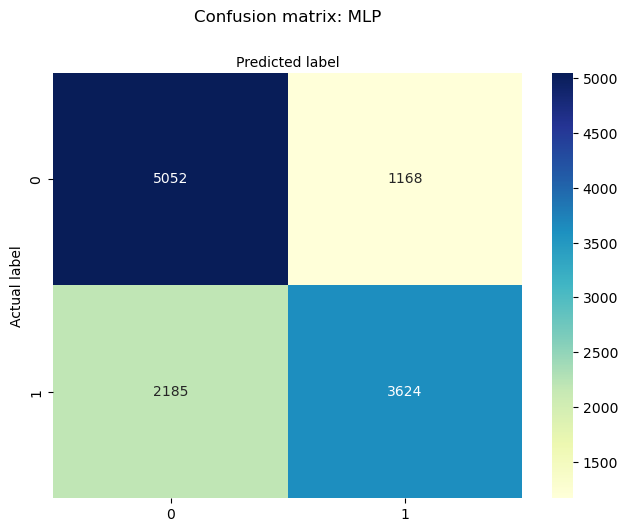

In [66]:
cnf_matrix = metrics.confusion_matrix(y_test, mlp_pred_cv)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: MLP', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## SVM Model

In [67]:
# without cv
svm = SVC(random_state=1)

# Fit the model
svm.fit(x_train, y_train)

SVC(random_state=1)

In [68]:
# Make predictions
svm_pred = svm.predict(x_test)

# accuracy
svm_accuracy = metrics.accuracy_score(y_test, svm_pred)*100
print(f"Accuracy without CV: {svm_accuracy:.2f}")

Accuracy without CV: 72.15


In [69]:
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}
svm_best_params = {
    'C': [10],
    'kernel': ['rbf'],
    'gamma': ['auto'],
}

# Create grid search
svm_gridsearch = GridSearchCV(estimator=svm, param_grid=svm_best_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search
svm_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=1), n_jobs=-1,
             param_grid={'C': [10], 'gamma': ['auto'], 'kernel': ['rbf']},
             scoring='accuracy')

In [70]:
svm_best_params = svm_gridsearch.best_params_
svm_best_estimator = svm_gridsearch.best_estimator_

print(f"Best Parameters : {svm_best_params}")
print(f"Best Estimator  : {svm_best_estimator}")

Best Parameters : {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Estimator  : SVC(C=10, gamma='auto', random_state=1)


In [71]:
svm_pred_cv = svm_best_estimator.predict(x_test)

In [72]:
svm_accuracy_cv = metrics.accuracy_score(y_test, svm_pred_cv)*100
print(f"Best Accuracy: {svm_accuracy_cv:.2f}")

Best Accuracy: 72.03


In [73]:
print(f"SVM accuracy without CV : {svm_accuracy:.2f}")
print(f"SVM accuracy with CV    : {svm_accuracy_cv:.2f}")

SVM accuracy without CV : 72.15
SVM accuracy with CV    : 72.03


In [74]:
classification_report_str = classification_report(y_test, svm_pred_cv, digits=4)

print("Classification Report for SVM with CV:\n", classification_report_str)

Classification Report for SVM with CV:
               precision    recall  f1-score   support

           0     0.7122    0.7706    0.7402      6220
           1     0.7307    0.6666    0.6972      5809

    accuracy                         0.7203     12029
   macro avg     0.7214    0.7186    0.7187     12029
weighted avg     0.7211    0.7203    0.7194     12029



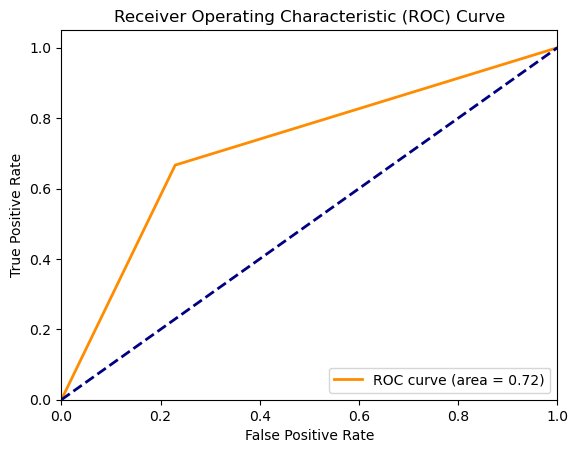

In [75]:
from sklearn.metrics import roc_curve, auc

# Assuming you have your true labels for the test set (y_test) and predictions (y_test_pred)
# y_test: true labels
# y_test_pred: predicted labels or probabilities for the positive class

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, svm_pred_cv)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

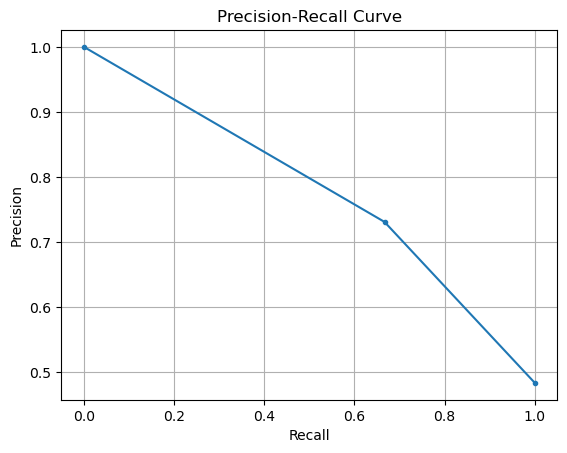

In [76]:
# Assuming you have true labels y_true and model predictions y_pred
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, svm_pred_cv)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

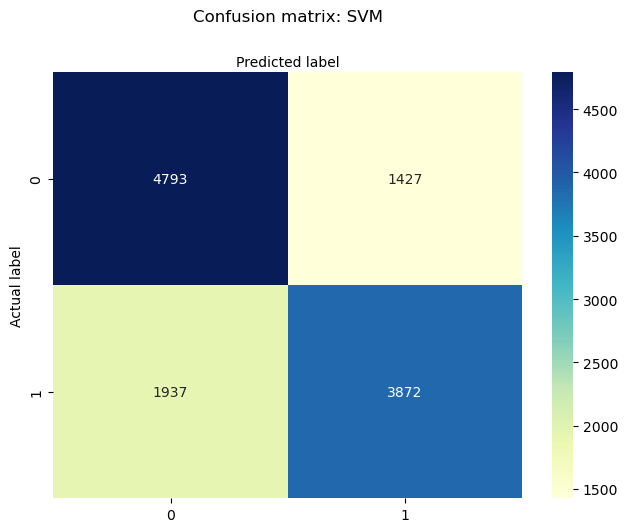

In [77]:
cnf_matrix = metrics.confusion_matrix(y_test, svm_pred_cv)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## XGboost Model

In [78]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [79]:
# Define parameters for XGBoost model
params = {
    'max_depth': 3,
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': 3,  # Number of classes in the target variable
    'eta': 0.3
}

In [80]:
# Train the XGBoost model
num_round = 10  # Number of boosting rounds
model = xgb.train(params, dtrain, num_round)

In [81]:
# Make predictions on the testing data
xgb_pred = model.predict(dtest)

In [82]:
# Evaluate the model
xgb_accuracy = metrics.accuracy_score(y_test, xgb_pred)*100
print(f"Accuracy without CV: {xgb_accuracy:.2f}")

Accuracy without CV: 71.97


In [83]:
# Define the parameter grid
xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
}

# Create XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Create grid search
xgb_gridsearch = GridSearchCV(estimator=xgb_classifier, param_grid=xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search
xgb_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [84]:
# Get the best parameters and best score
best_params = xgb_gridsearch.best_params_
best_score = xgb_gridsearch.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best score: 0.7175608553029119


In [85]:
# Assuming you have already obtained the best estimator from grid search
xgb_best_estimator = xgb_gridsearch.best_estimator_

In [86]:
# Make predictions on the test data
xgb_pred_cv = xgb_best_estimator.predict(x_test)
xgb_accuracy_cv = metrics.accuracy_score(y_test, xgb_pred_cv) * 100
print(f"Best Accuracy: {xgb_accuracy_cv:.2f}")

Best Accuracy: 72.28


In [87]:
print(f"XGB accuracy without CV : {xgb_accuracy:.2f}")
print(f"XGB accuracy with CV    : {xgb_accuracy_cv:.2f}")

XGB accuracy without CV : 71.97
XGB accuracy with CV    : 72.28


In [88]:

classification_report_str = classification_report(y_test, xgb_pred_cv, digits=4)
print("Classification Report for XGB with CV:\n", classification_report_str)

Classification Report for XGB with CV:
               precision    recall  f1-score   support

           0     0.7102    0.7834    0.7451      6220
           1     0.7394    0.6578    0.6962      5809

    accuracy                         0.7228     12029
   macro avg     0.7248    0.7206    0.7206     12029
weighted avg     0.7243    0.7228    0.7215     12029



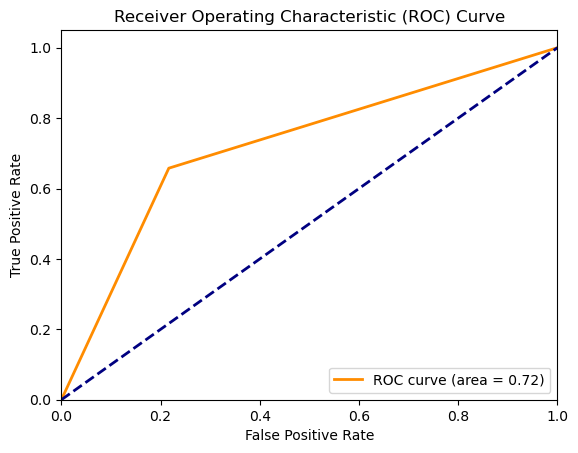

In [89]:
from sklearn.metrics import roc_curve, auc

# Assuming you have your true labels for the test set (y_test) and predictions (y_test_pred)
# y_test: true labels
# y_test_pred: predicted labels or probabilities for the positive class

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, xgb_pred_cv)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

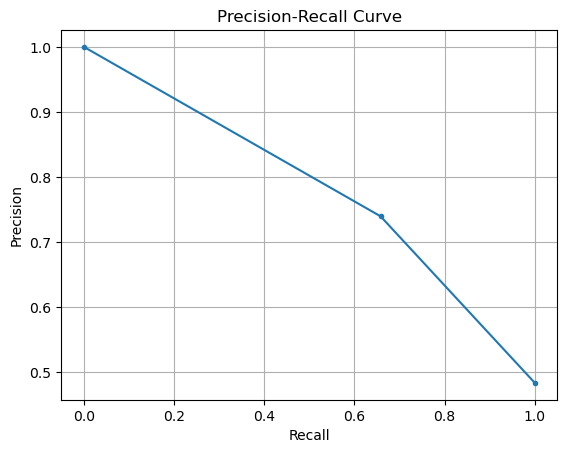

In [90]:
# Assuming you have true labels y_true and model predictions y_pred
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, xgb_pred_cv)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

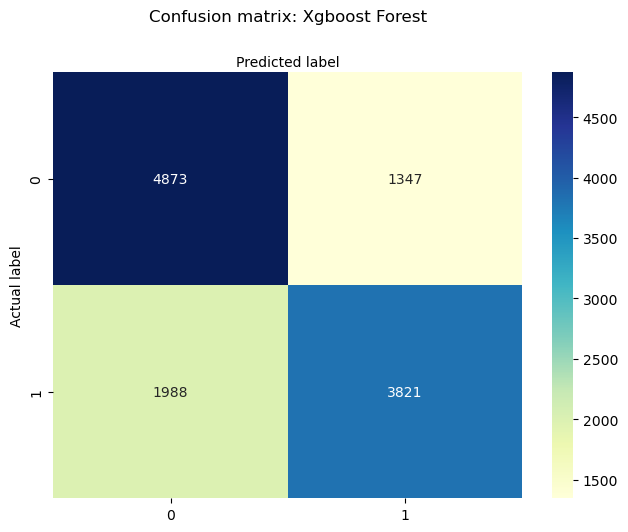

In [91]:
cnf_matrix = metrics.confusion_matrix(y_test, xgb_pred_cv)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: Xgboost Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## KNN Model

In [92]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [93]:
# Make predictions
knn_pred = knn.predict(x_test)

# accuracy
knn_accuracy = metrics.accuracy_score(y_test, knn_pred)*100
print(f"Accuracy without CV: {knn_accuracy:.2f}")

Accuracy without CV: 63.26


In [94]:
# Define parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5],                  # Number of neighbors
    'weights': ['uniform', 'distance'],     # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree'],     # Algorithm used to compute the nearest neighbors
    'leaf_size': [10, 20],                   # Leaf size passed to BallTree or KDTree
    'p': [1, 2]                              # Power parameter for Minkowski distance
}
best_parameters = {
    'n_neighbors': [5],
    'weights': ['uniform'],
    'algorithm': ['auto'],
    'leaf_size': [20],
    'p': [2],
}
# Create grid search
knn_gridsearch = GridSearchCV(estimator=knn, param_grid=best_parameters, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search
knn_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'algorithm': ['auto'], 'leaf_size': [20],
                         'n_neighbors': [5], 'p': [2], 'weights': ['uniform']},
             scoring='accuracy')

In [95]:
# mlp_best_params = mlp_gridsearch.best_params_
knn_best_estimator = knn_gridsearch.best_estimator_
print(f"Best Estimator  : {knn_best_estimator}")

Best Estimator  : KNeighborsClassifier(leaf_size=20)


In [96]:
knn_best_params = knn_gridsearch.best_params_
print(f"Best Parameters : {knn_best_params}")

Best Parameters : {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [97]:
knn_pred_cv = knn_best_estimator.predict(x_test)

In [98]:
knn_accuracy_cv = metrics.accuracy_score(y_test, knn_pred_cv)*100
print(f"Best Accuracy: {knn_accuracy_cv:.2f}")

Best Accuracy: 66.90


In [99]:
print(f"KNN accuracy without CV : {knn_accuracy:.2f}")
print(f"KNN accuracy with CV    : {knn_accuracy_cv:.2f}")

KNN accuracy without CV : 63.26
KNN accuracy with CV    : 66.90


In [100]:
classification_report_str = classification_report(y_test, knn_pred_cv, digits=4)

print("Classification Report for KNN with CV:\n", classification_report_str)

Classification Report for KNN with CV:
               precision    recall  f1-score   support

           0     0.6904    0.6527    0.6710      6220
           1     0.6487    0.6865    0.6671      5809

    accuracy                         0.6690     12029
   macro avg     0.6695    0.6696    0.6690     12029
weighted avg     0.6702    0.6690    0.6691     12029



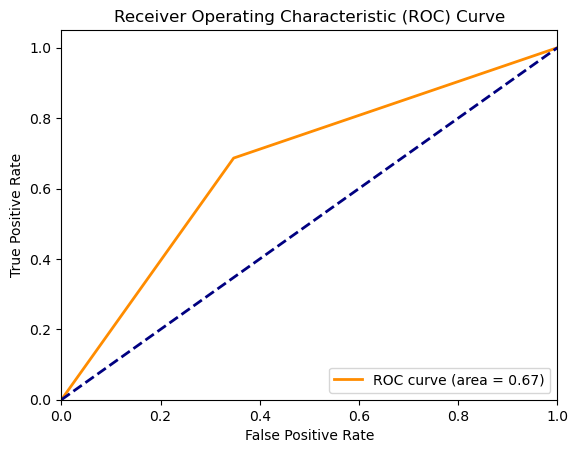

In [101]:
from sklearn.metrics import roc_curve, auc

# Assuming you have your true labels for the test set (y_test) and predictions (y_test_pred)
# y_test: true labels
# y_test_pred: predicted labels or probabilities for the positive class

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, knn_pred_cv)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

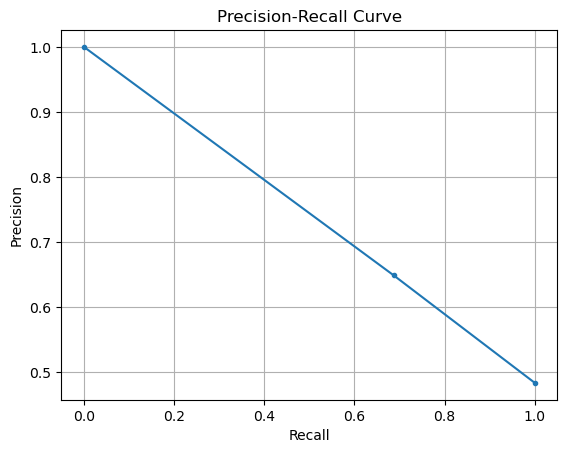

In [102]:
# Assuming you have true labels y_true and model predictions y_pred
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, knn_pred_cv)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

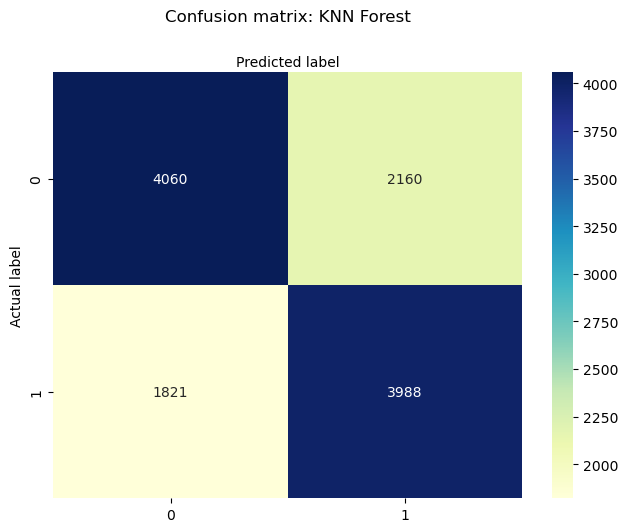

In [103]:
cnf_matrix = metrics.confusion_matrix(y_test, knn_pred_cv)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: KNN Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [104]:
print(f"Logistic Regression accuracy with CV    : {logreg_accuracy_cv:.2f}")
print(f"Random Forest accuracy with CV    : {rf_accuracy_cv:.2f}")
print(f"Multi Layer Perceptron accuracy with CV   : {mlp_accuracy_cv:.2f}")
print(f"Support Vector Machine with CV   : {svm_accuracy_cv:.2f}")
print(f"Xgboost accuracy with CV    : {xgb_accuracy_cv:.2f}")
print(f"K Nearest Neighbour accuracy with CV    : {knn_accuracy_cv:.2f}")

Logistic Regression accuracy with CV    : 71.66
Random Forest accuracy with CV    : 71.78
Multi Layer Perceptron accuracy with CV   : 72.13
Support Vector Machine with CV   : 72.03
Xgboost accuracy with CV    : 72.28
K Nearest Neighbour accuracy with CV    : 66.90
